### 색상 막대 맞춤 변경하기
색상 막대는 색상의 의미르 이해할 수 있는 별도의 축이다

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

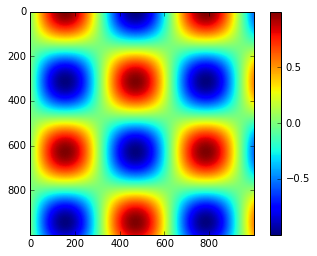

In [2]:
x = np.linspace(0,10,1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

### 색상 막대 맞춤 변경하기

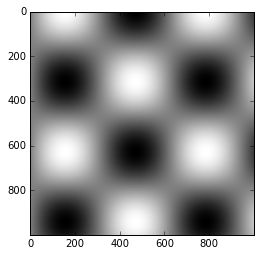

In [3]:
plt.imshow(I, cmap='gray')

사용할 수 있는 모든 색상 지도는 plt.cm 네임스페이스에 있다.

### 색상 지도 선택하기
크게 색상 지도에는 세가지 다른 범주가 있다.
1. 순차적 색상지도
하나의 연속적인 순서를 가지는 색상으로 구성되 있다. binary 또는 viridis
2. 발산적 색상 지도
이것은 일반적으로 평균을 기준으로 양수 및 음수 편차를 나타내는 두 가지 구별된 색상을 포함한다.
3. 정성적 색상지도
특정 순서없이 색상을 혼합한다. rainbow or jet

In [4]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """색상 지도의 회색 조 버전을 반환"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # RGBA를 감지할 수 있는 회색 조 밝기로 전환
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """색상 지도를 그에 상응하는 회색조 버전과 함께 플로팅"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

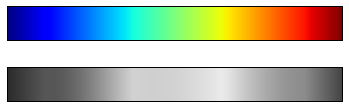

In [5]:
view_colormap('jet')

회색 조 이미지의 밝은 줄무늬를 확인하자 풀컬러에서조차 균일하지 않은 이 밝기는 눈이 색상 범위의 특정 부분에 걸려 데이터 세트의 중요하지 않은 부분을 강조하게 된다. 해당 범위 전반에 균일한 밝기 변화를 가지도록 제작된 viridis와 같은 색상 지도를 사용하는 것이 낫다.

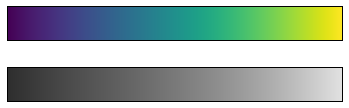

In [6]:
view_colormap('viridis')

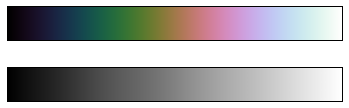

In [7]:
view_colormap('cubehelix')

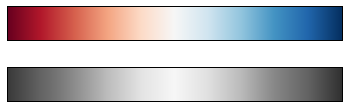

In [8]:
view_colormap('RdBu')

### 색상 한계 및 확장
Matplotlib에서는 색상 막대를 광범위하게 맞춤 변경할 수 있다. 색상 막대 자체가 단순히 plt.Axes의 인스턴스이기 때문에 지금까지 배운 축과 눈금의 포맷을 지정하는 방식을 모두 적용할 수 있다. extend 속성을 설정해서 위아래에 삼각형 화살표로 색 한계를 좁히고 범위를 벗어난 값을 표시할 수 있다. 이 기능은 노이즈에 영향을 받는 이미지를 표시하는 경우에 유용할 수 있다

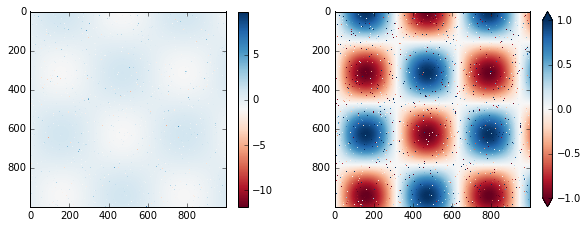

In [9]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);



왼쪽 패널에서 기본 색상 경계값은 노이즈가 낀 픽셀에 대응하며 노이즈 범위로 인해 관심있는 패턴이 완전히 흐릿해지는 것을 볼수 있다. 오른쪽 패널에서는 색상 경계값을 직접 설정하고 그 한계의 위나 아래 값을 표시하는 확장을 추가한다. 그 결과로 데이터에 대해 훨씬 더 유용한 시각화를 얻을 수 있다.

### 불연속적인 색상 막대
색상 지도는 연속적인게 기본이지만 때로는 불연속적인 값을 표현하고 싶을 수도 있다. 가장 쉬운 방법은 plt.cm.get_cmap()함수를 사용하고 적합한 색상 지도으 ㅣ이름과 함게 원하는 구간(bin)의 개수를 전달하는 것이다.

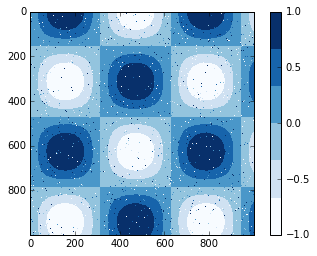

In [10]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues',6))
plt.colorbar()
plt.clim(-1,1)

### 예제 손으로 쓴 숫자
불연속적인 색상 지도가 유용하게 사용하는 예로 손으로 쓴 숫자 데이터를 시각화해본다. 이 데이터는 Scikit-Learn에 포함되어 있으며 다양한 손으로 쓴 숫자를 보여주는 2000여개의 8x8 썸네일 구성되어 있다.

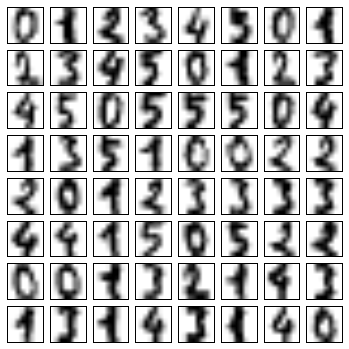

In [12]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8,8,figsize=(6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

각 숫자가 64픽셀의 색조로 정의되기에 각 숫자를 64차원 공간에 놓인 점으로 생각할 수 있다. 여기서 각 차원은 픽셀 하나의 밝기를 나타낸다. 하지만 이렇게 고차원 공간에서의 관계를 시각화하는 것은 매우 어려울 수 있다. 이에 접근하는 한 가지 방ㅂ버은 관심 있는 관계는 유지하되 데이터의 차원을 축소하기 위해 다양체 학습과 같은 차원 축소 기법을 사용하는 것이다. 차원 축소는 비지도 기계 학습의 한 예다.

C:\ProgramData\Anaconda3\envs\DataScience\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\ProgramData\Anaconda3\envs\DataScience\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


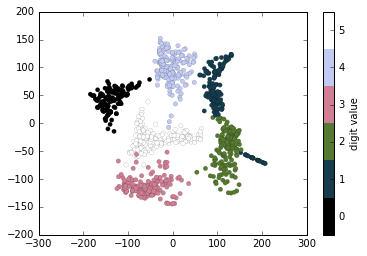

In [15]:
#IsoMap을 이용해 숫자를 2차원에 사영
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)
# 결과 플룻 그리기
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

### 다중 서브플롯
서로 다른 데이터뷰를 나란히 비교하고 싶을때가 있다. 이것 때문에 matplotlib에는 서브플롯(subplot)이라는 개념이 있다. 서브플롯은 하나의 그림 내에 공존할 수 있는 더 작은 축의 그룹을 말한다. 이 서브플롯은 삽입된 플릇(insert)이나 플릇의 그리드, 그 밖의 더 복잡한 레이아웃일 수 있다. 

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### plt.axes: 직접 만든 서브플릇
추글 생성하는 가장 기본적인 방법은 plt.axes 함수를 사용하는 것이다. 앞에서 봤듯이 기본적으로 이 함수는 전체 그림을 채우는 표준 축 객체를 생성한다. plt.axes는 선택적으로 그림 좌표계의 네 개의 숫자 목록을 인수로 취할 수도 있다. 이 숫자는 그림 좌표계의 [아래, 왼쪽, 너비, 높이]를 나타내는 것으로 왼쪽 하단의 0부터 오른쪽 상단의 1까지의 범위를 가진다.  

x와 y의 위치를 0.65로 설정하고(그림 65%의 너비와 높이에서 시작) x와 y범위를 0.2로 설정해서(축의 크기는 그림 너비와 높이의 각 20%) 다른 축의 오른쪽 상단 구석에 삽입된 축을 만들 수 있다.

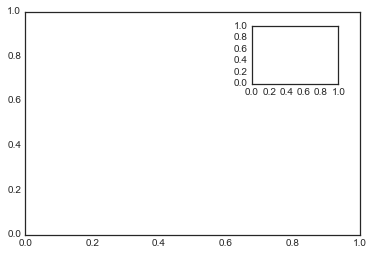

In [17]:
ax1 = plt.axes()
ax2 = plt.axes([0.65,0.65,0.2,0.2])

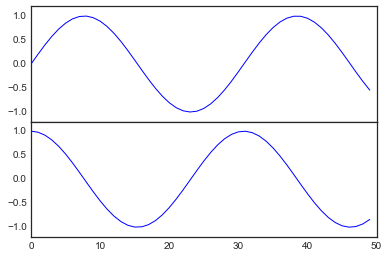

In [18]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

서로 맞닿은 두 개의 축(위축에는 눈금 레이블이 없음)이 만들어 졌다. 위 패널의 하단(위치 0.5)이 아래 패널의 상단(위치 0.1+0.4)과 일치한다.
### plt.subplot: 간단한 서브플롯의 그리드
정렬된 서브플롯의 열이나 행은 Matplotlib이 그것들을 쉽게 만들 수 있도록 루틴이 있다. plt.subplot()은 그리드 안에 하나의 서브플롯을 만든다. 여기서는 3개의 정수르 ㄹ취하는데 각 왼쪽 상단에서 오른쪽 하단으로 이어지는 도식에서 만들 행 개수와 열개수, 플릇의 인덱스를 의미한다.

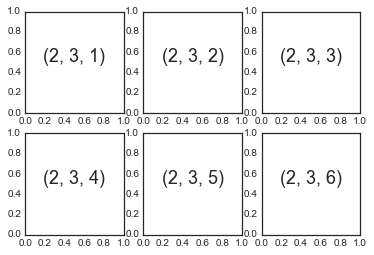

In [19]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

plt.subplots_abjust 명령어는 이 플릇들 사이의 간격을 조정하는데 사용된다. 다음 코드는 이와 유사한 객체지향 명령어인 fig.add_subplot()을 사용한 것으로 다음과 같다.

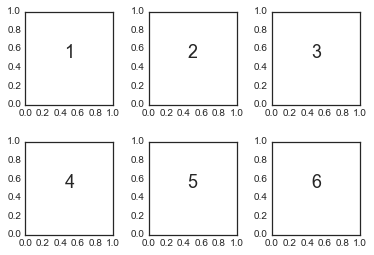

In [21]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((i)), fontsize=18, ha='center')

그림의 높이와 너비를 따라 서브플릇의 크기 단위로 간격을 지정하기 위해 plt.subplots_abjust의 hsapce와 wspace 인수를 사용했다 (이 경우 간격은 서브플롯의 너비와 높이의 40%로 설정했다)

### plt.subplots:한 번에 전체 그리드 만들기
plt.subplots()를 사용하는 것이 쉽다. 이 함수는 단일 서브 플롯을 만들지 않고 전체 그리드의 서브 플릇을 한 줄로 만들어 이를 Numpy배열로 반환한다. 인수로는 행과 열의 개수와 함게 선택적으로 서로 다른 축과의 관계를 지정하는 sharex와 sharey를 취한다.

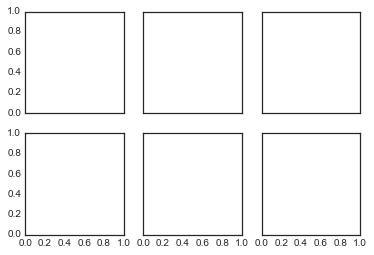

In [23]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

sharex와 sharey를 지정함으로써 그리드 내부의 레이블을 자동으로 제거해 플롯을 더 깖금하게 만들 었다. 결과로 얻은 축 인스턴스의 그리드는 Numpy배열로 변환되기 때문에 표준 배열 인덱싱 표기법을 사용해 원하는 축을 쉽게 지정할 수 있다.

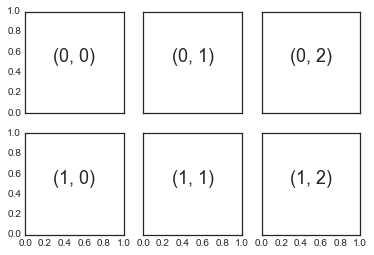

In [24]:
#축이 2차원 배열 안에 있어 [행, 열]로 인덱싱 할 수 있다.
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

### plt.GridSpec: 복잡한 배치
서브플롯을 규칙적으로 배치하는 그리드를 넘어 행과 열로 확장하려면 plt.GridSpec()을 사용하는 것이 좋다. plt.GridSpec() 객체가 플릇을 만들지는 않는다. 이 객체는 단순히 plt.subplot()명령어가 인식하는 편리한 인터페이스일 뿐이다. 예를 들어, 너비와 높이 여백을 지정한 두 개의 행과 세개의 열로 이뤄진 그리드에 대한 gridspec는 다음과 같다.

In [25]:
grid = plt.GridSpec(2,3, wspace=0.4, hspace=0.3)

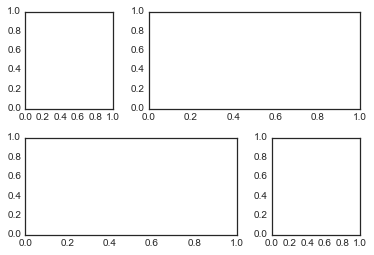

In [26]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

유연한 그리드 정렬은 광범위한 용도로 쓰인다. 개인적으로는 아래에 보여준 것 같은 다중 축 히스토그램을 만들 때 가장 자주 사용한다.

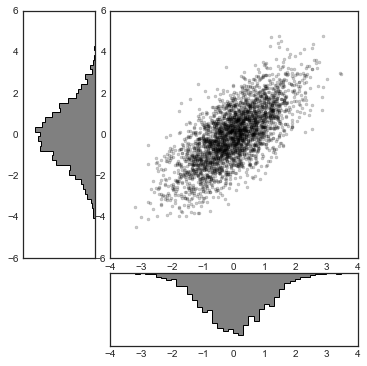

In [27]:
# 정규 분포 데이터 만들기
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# gridspec으로 축 설정하기
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 메인 축에 점 산포하기
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 보조 축상에 히스토그램 만들기
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

### 텍스트와 주석
어떤 경우에는 작은 텍스트 큐와 레이블이 필요하다. 가장 기본적인 유형의 주석은 축 레이블과 제목이지만 그 밖의 주석을 옵션으로 지정할 수도 있다. 데이터를 보면서 어떻게 시각화하고 주석을 달면 흥미로운 정보를 전달하는데 도움이 되는지 살펴보자

### 예제: 미국 출생률에 휴일이 미치는 영향
한 해 동안 평균 출생자 수 플롯을 만들었던 출생률 데이터에서 작업했던 데이터로 돌아가자

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [33]:
from datetime import datetime

births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

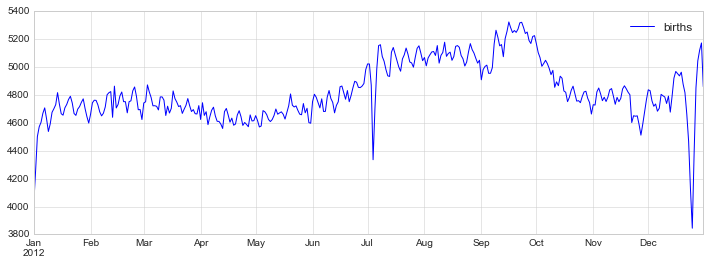

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

여기서 플릇의 특정 지점에 대해 주석을 다는 것이 유용할때가 많다. 이때 특정 x/y값에 텍스트를 위치시키는 plt.text나 ax.text명령어로 직접 주석을 달 수 있다.

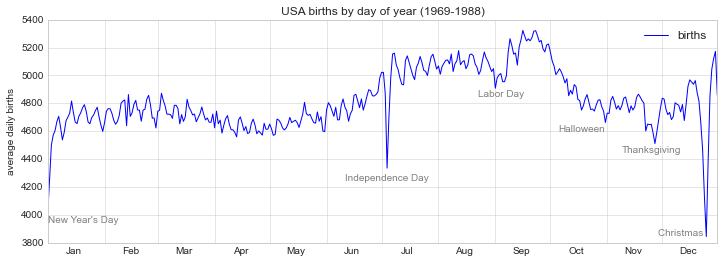

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.text 메서드는 x위치, y위치, 문자열 그리고 텍스트의 색상, 크기, 스타일, 배치 방식 및 다른 속성을 지정하는 키워드를 취한다. 여기서는 ha=right와 ha=center를 사용했는데, ha는 horizontal alignmnet 수평배치의 약어이다. 사용 가능한 옵션에 대한 더 자세한 내용은 plt.text()와 mpl.text.Text()를 참고한다.

### 변환 및 텍스트 위치
때로는 텍스트를 데이터와 독립적으로 축이나 그림 상의 위치에 고정시키는 것이 나을 때가 있다. Matplotlib에서는 변환(transform)을 수정해 이 작업을 수행한다. 모든 그래픽 디스플레이 프레임워크는 좌표계 사이에 변환을 위한 체계가 필요하다. (x,y) = (1,1)의 데이터 점은 어떻게든 그림 상의 특정 위치에 표시돼야 하므로 결국 화면에 픽셀로 표시해야 한다. 수학적으로 그러한 좌표 변환은 비교적 간단하며, Matplotlib은 내부적으로 그 작업을 수행하는데 사용하는 잘 구현된 일련의 도구를 가지고 있다.  

그림 상에서 텍스트 위치를 고려할 때는 그 정보를 아는 게 도움될 것이다.  

ax.transData 데이터 좌표와 관련된 변환
ax.transAxes 축과 관련된 변환(축 차원의 단위로)
fig.transFigure 그림과 관련된 변환(그림 차원의 단위로)

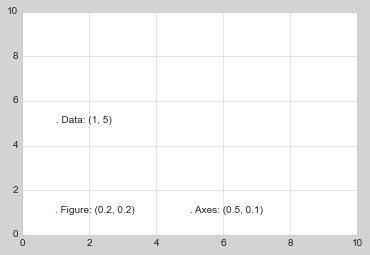

In [36]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0,10,0,10])

#transform = ax.transData가 기본값이지만 그대로 직접 지정하겠다.
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

기본적으로 텍스트는 지정된 좌표의 왼쪽 상단에 배치된다. 여기서 각 문자열 시작 부분에 있는 '.'이 해당 좌표 위치를 거의 정확하게 표시한다. transData좌표는 x축과 y축 레이블과 관련된 일반적인 데이터 좌표를 제공한다. transAxes 좌표는 축의 왼쪽 아래로부터의 위치(여기서는 하얀 박스)를 축 크기의 분수로 제공한다. transFigure 좌표는 비슷하지만. 그림의 왼쪽 아래로부터의 위치(여기에서는 회색 박스)를 그림 크기의 분수로 지정한다.

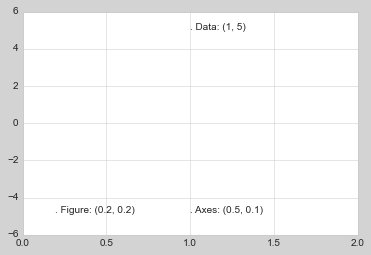

In [37]:
ax.set_xlim(0,2)
ax.set_ylim(-6,6)
fig

축 한계값을 대화식으로 바꿈으로 좀 더 명확하게 확인 할 수 있다.

### 화살표와 주석
눈금 표시와 텍스트 외에 유용한 주석 표시로는 단순한 화살표가 있다. Matplotlib에서 화살표를 그리는 것은 어렵다. plt.arrow()함수가 있지만, 개인적으로 사용하지 않는 것이 낫다고 생각한다. 이 함수가 생성한 화살표는 플롯의 가로 세로 비율이 바뀔 때 마다 영향을 받는 SVG객체여서 원하는 결과를 얻기 어렵기 때문이다. 그 대신 plt.annotate()함수를 사용 하는 것이 낫다. 이 함수는 텍스트와 화살표를 만들며, 화살표를 매우 유연하게 지정할 수 있다.

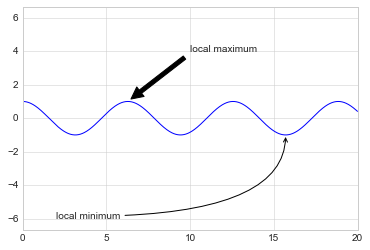

In [38]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

화살표의 스타일은 다양한 옵션을 제공하는 arrowprops 딕셔너리를 통해 제어한다.

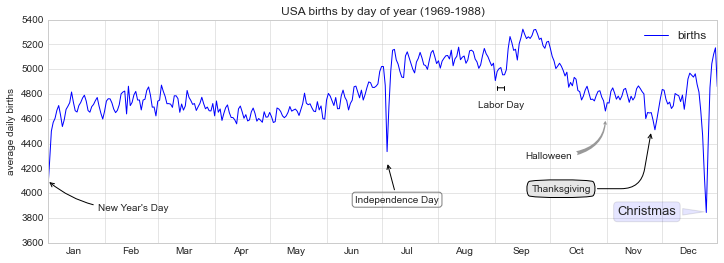

In [39]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

화살표와 텍스트박스를 매우 자세히 지정할 수 있어 어떤 화살표 스타일이든 거의 원하는 대로 만들 수 있다.